Decision Tree

Dataset: Telecom Dataset
Consider the given dataset. Perform necessary cleaning and EDA. Perform feature engineering. Check the most relevant feature to be used for Decision Tree model. Interpret the results and evaluate based on respective performance metrics.

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [59]:
df = pd.read_csv('telecom.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [60]:
#no of rows and columns
df.shape

(3333, 20)

In [61]:
#summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [62]:
#checking null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [63]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

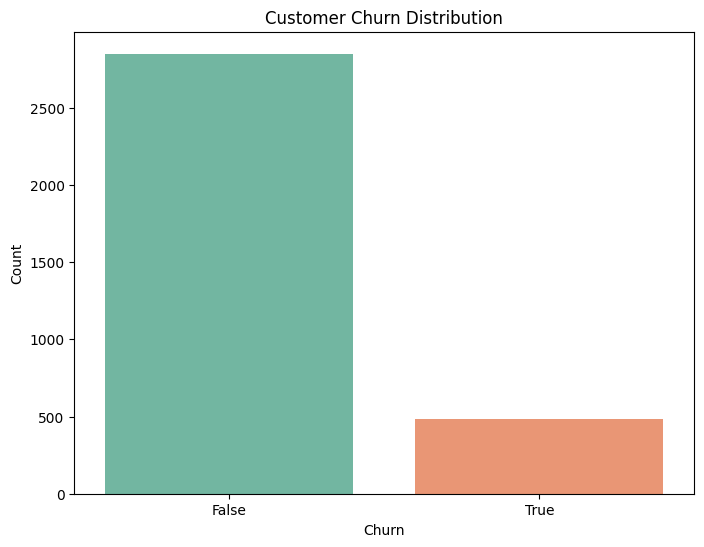

In [64]:
# 1. Countplot for Churn- churn refers to the percentage of existing customers who’ve stopped doing business with a company during a specified period.
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title("Customer Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


# Interpretation of the Plot

The Churn column likely contains binary values (Yes or No).
The countplot will show two bars:One bar for customers who did not churn.
                                    One bar for customers who churned.
The "No Churn" bar is significantly higher than the "Churn" bar → Most customers stayed with the company

# Insights

Most customers are staying, the company’s services might be satisfactory.
If incase churn is high, the company may need to improve customer retention strategies

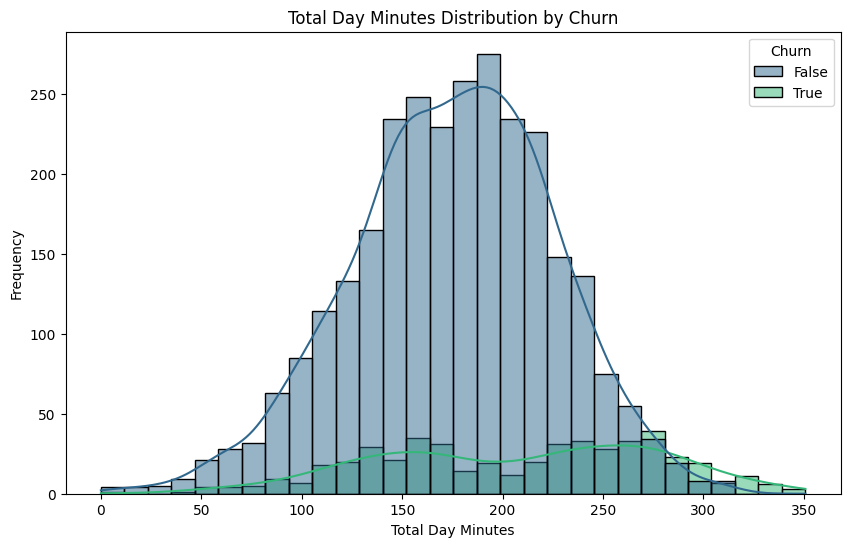

In [65]:
# 2. Distribution of Total Day Minutes for Churned vs. Not Churned Customers
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Total day minutes', hue='Churn', kde=True, palette='viridis', bins=30)
plt.title("Total Day Minutes Distribution by Churn")
plt.xlabel("Total Day Minutes")
plt.ylabel("Frequency")
plt.show()

# Interpretation

Churn is relatively low in this telecom company
The company might have good retention strategies, keeping most customers satisfied.
Total Day Minutes is NOT a strong factor influencing churn
Since both churned and non-churned distributions overlap, other factors (e.g., customer service issues, pricing, contract terms) might drive churn more than call usage.
High usage does not necessarily mean dissatisfaction
Customers with high day minutes are still likely to stay, meaning they might find value in the service.

# Insights
Since most high-usage customers stay, the company should focus on customer experience and service quality rather than worrying about call usage limits.
To better understand what causes churn, analyze other features like:
Customer service calls (are churned customers making more complaints?).
Monthly charges (are churned users paying more?).
Contract type (do churned users have month-to-month plans vs. long-term contracts?).



In [66]:
# 4. Heatmap of Correlation Matrix

df_new = df.select_dtypes(exclude = ['object'])
corr_matrix = df_new.corr()
corr_matrix["Churn"].sort_values(ascending = False)

Churn                     1.000000
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64

In [67]:
col = df.select_dtypes(include = ['object','bool']).columns
col

Index(['State', 'International plan', 'Voice mail plan', 'Churn'], dtype='object')

In [68]:
#encoding categorical values
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for co in col:
    df[co] = le.fit_transform(df[co])

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [69]:
#splitting dataset for training and testing
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['Churn','Total eve calls', 'Area code','Total night calls', 'Total intl calls','Number vmail messages'], axis = 1)
y = df['Churn']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [71]:
#training decision tree model

from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth = 3)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
#predicting column ' churn' values with the model

y_pred = model.predict(X_test)

In [73]:
#checking accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy_score(y_test, y_pred)

0.9025487256371814

In [74]:
confusion_matrix(y_test, y_pred)

array([[571,   3],
       [ 62,  31]], dtype=int64)

Conclusion:
The model performs very well in predicting non-churned customers with a high True Negative Rate.
However, the model has a high number of False Negatives (62), meaning it often misses customers who actually churned.
Precision (Churned Customers):
The model is 91% accurate when predicting customer churn.

Recall (Churned Customers):
The low recall indicates the model struggles to detect all churned customers, which is a critical metric in telecom datasets where predicting churn is more important than simply classifying non-churners.

Text(50.722222222222214, 0.5, 'Actual')

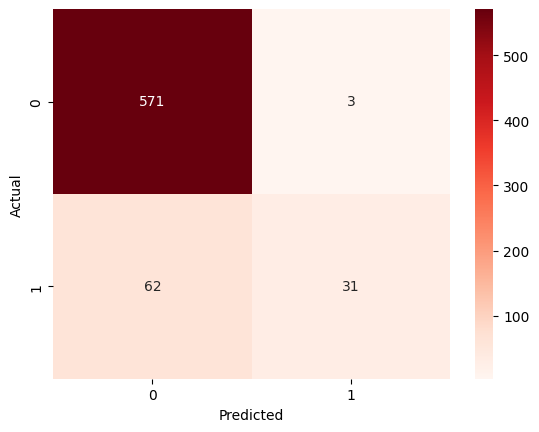

In [75]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap='Reds', annot = True, fmt = "d")
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       574
           1       0.91      0.33      0.49        93

    accuracy                           0.90       667
   macro avg       0.91      0.66      0.72       667
weighted avg       0.90      0.90      0.88       667



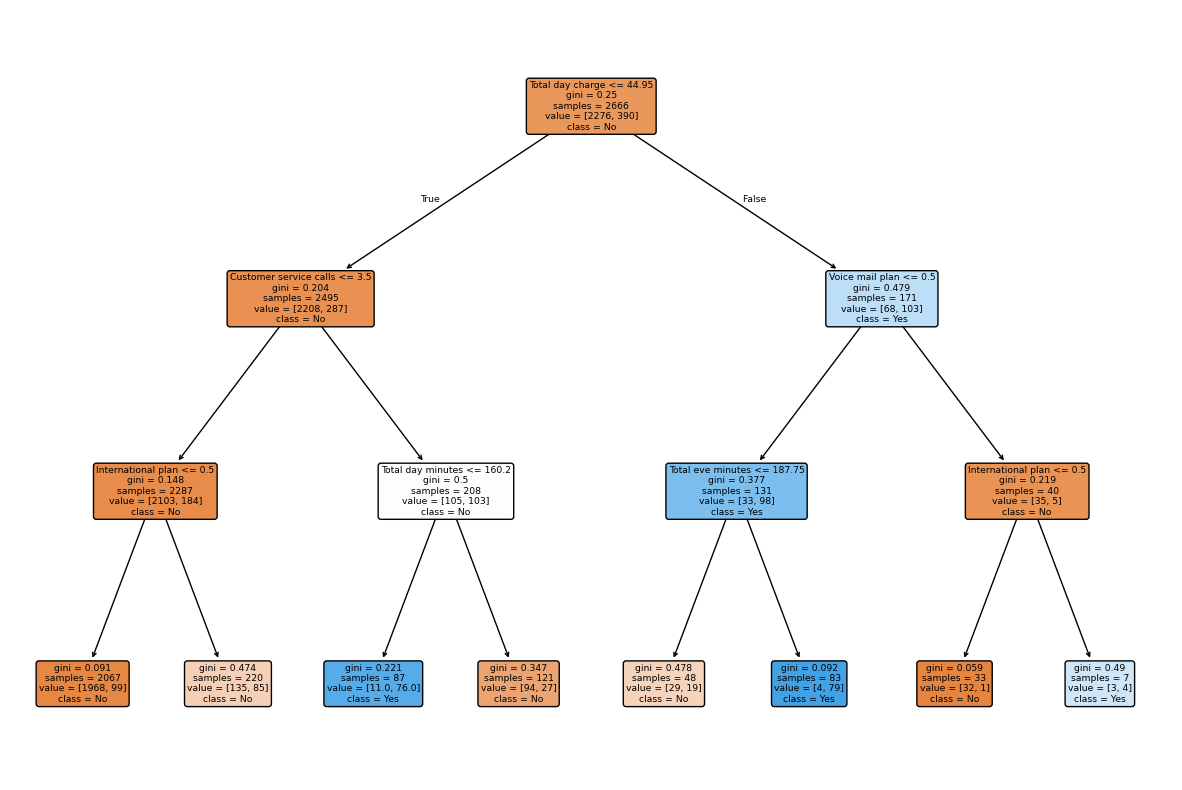

In [77]:
plt.figure(figsize=(15,10))
tree.plot_tree(model, filled = True, feature_names = X.columns, class_names = ['No', 'Yes'], rounded = True)
plt.show()

Customers with high total day charges are at high risk of churning.
→ Offer discounts or better plans to such customers to retain them.

Frequent customer service callers (above 3.5 calls) have higher churn risk.
→ Improve customer service quality to reduce dissatisfaction.

Voice mail plan subscription plays a role in churn behavior.
→ Target promotions for voice mail plans to high-risk customers.

Customers without an international plan are more likely to stay.
→ International plan users may expect better call rates or perks to stay loyal.

In [ ]:
""""""total day charge, customer service calls, and voicemail plans are key churn indicators.
By understanding these insights, the telecom company can create targeted retention strategies to reduce churn.